In [25]:
#%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine)

# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
#Session(link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Most recent date in the data set.
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_date

('2017-08-23',)

In [10]:
# Query to retrieve the last 12 months of precipitation data and plot the results. 
one_year_back_date = dt.date(2017,8,23)- dt.timedelta(days=365)
print(f"One Year back date = {one_year_back_date}")

# Query to retrieve the date and precipitation scores
one_year_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>=one_year_back_date).\
        filter(Measurement.date <= latest_date[0]).all()

One Year back date = 2016-08-23


In [11]:
# Saved the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(one_year_data, columns = ['Date', 'Precipitation']).set_index('Date')

prcp_df = prcp_df.sort_values(by = 'Date')
prcp_df = prcp_df.dropna()
prcp_df

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


<AxesSubplot:xlabel='Date'>

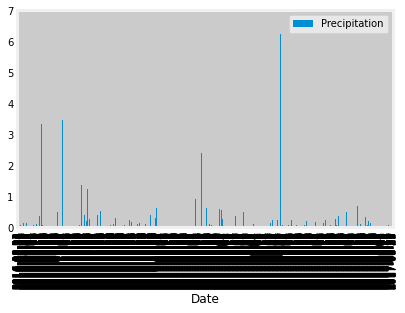

In [12]:
# Plotting with Matplotlib
prcp_df.plot.bar()


In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data

# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset
session.query(Station.station).count()


9

In [27]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
active_station = session.query(Measurement.station,func.count(Measurement.station)).\
        group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_station



[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Most active station
most_active_station = active_station[0][0]
most_active_station

'USC00519281'

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_stats = session.query(func.min(Measurement.tobs).label('Min Temperature'),func.max(Measurement.tobs).label('Max Temperature')\
                ,func.avg(Measurement.tobs).label('Average Temperature')).filter(Measurement.station ==most_active_station ).all()

print(f'Min Temp for station USC00519281 is {temp_stats[0][0]}')
print(f'Max Temp for station USC00519281 is {temp_stats[0][1]}')
print(f'Avg Temp for station USC00519281 is {temp_stats[0][2]}')

Min Temp for station USC00519281 is 54.0
Max Temp for station USC00519281 is 85.0
Avg Temp for station USC00519281 is 71.66378066378067


In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
latest_date = session.query(Measurement.date).filter(Measurement.station ==most_active_station ).order_by(Measurement.date.desc()).first()
latest_date
one_year_back_date = dt.date(2017,8,18)- dt.timedelta(days=365)
one_year_back_date
temp = session.query(Measurement.date,Measurement.tobs).filter(Measurement.date>=one_year_back_date).\
    filter(Measurement.date<=latest_date[0]).all()

In [19]:
# Saved the query results as a Pandas DataFrame and set the index to the date column
temp_df = pd.DataFrame(temp,columns=['Date', 'Temperature'])


Text(0.5, 0, 'Temperature')

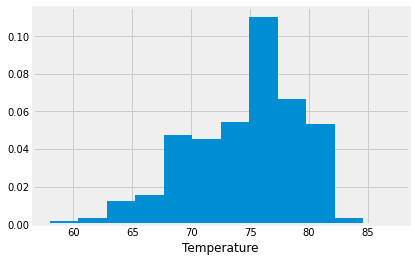

In [20]:
n_bins = 12
plt.hist(temp_df.Temperature, n_bins, density = True, 
         histtype ='bar')
plt.xlabel("Temperature")

In [21]:
# Close Session
#session.close()